# Intro

In this program I'll use a dataset (`data.csv`) to diagnose breast cancer as malignant (`M`) or benign (`B`)
First i will do some pre-processing adjustments as well as splitting the data into training and testing sets.

In order to properly build ML models, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. 
So I will standarize training and test sets and plot the `area_mean` feature before and after the standardization. 

Then I'll fit a logistic regression model (model1) to the normalized training data and report the training time.
As well as eport the accuracy and recall for model1's predictions. 

After I'll be using PCA to reduce the dimensionality of my data and to help visualise.

I did this excercise just to familiarize myself with PCA and dimensionality reductions since it is a massive tool in ML.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import time

%matplotlib inline

In [2]:


data = pd.read_csv('data.csv')

first5 = data.head()

data = data.drop('id', axis=1)
data = data.dropna()

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# (0 and 1 instead of 'B' and 'M')
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.1, random_state=42)


train_size = X_train.shape, y_train.shape
test_size = X_test.shape, y_test.shape

first5, train_size, test_size


(         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
 0    842302         M        17.99         10.38          122.80     1001.0   
 1    842517         M        20.57         17.77          132.90     1326.0   
 2  84300903         M        19.69         21.25          130.00     1203.0   
 3  84348301         M        11.42         20.38           77.58      386.1   
 4  84358402         M        20.29         14.34          135.10     1297.0   
 
    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
 0          0.11840           0.27760          0.3001              0.14710   
 1          0.08474           0.07864          0.0869              0.07017   
 2          0.10960           0.15990          0.1974              0.12790   
 3          0.14250           0.28390          0.2414              0.10520   
 4          0.10030           0.13280          0.1980              0.10430   
 
    ...  radius_worst  texture_worst  perimeter_

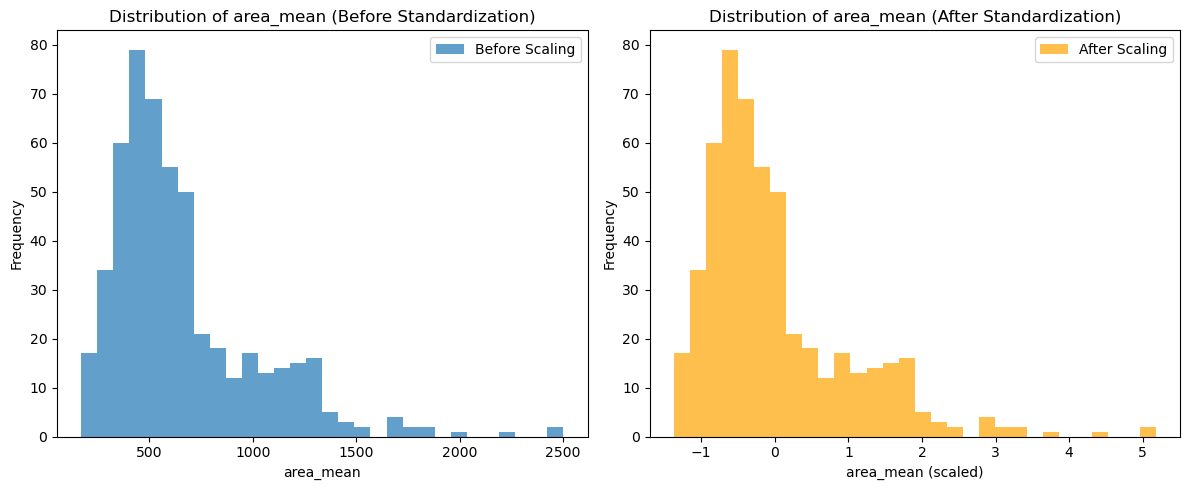

In [3]:


scaler = StandardScaler()


xtrain_scaled = scaler.fit_transform(X_train)
xtest_scaled = scaler.transform(X_test)


df_xtrain_scaler = pd.DataFrame(xtrain_scaled, columns=X_train.columns)
df_xtest_scaler = pd.DataFrame(xtest_scaled, columns=X_test.columns)


plt.figure(figsize=(12, 5))

# Before standardization
plt.subplot(1, 2, 1)
plt.hist(X_train['area_mean'], bins=30, alpha=0.7, label='Before Scaling')
plt.title('Distribution of area_mean (Before Standardization)')
plt.xlabel('area_mean')
plt.ylabel('Frequency')
plt.legend()

# After standardization
plt.subplot(1, 2, 2)
plt.hist(df_xtrain_scaler['area_mean'], bins=30, alpha=0.7, label='After Scaling', color='orange')
plt.title('Distribution of area_mean (After Standardization)')
plt.xlabel('area_mean (scaled)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
model1 = LogisticRegression()
start = time.time()

model1.fit(xtrain_scaled, y_train)

end = time.time()
trainingtime = end - start

ytrain_pred = model1.predict(xtrain_scaled)

accuracy_train = accuracy_score(y_train, ytrain_pred)
recall_train = recall_score(y_train, ytrain_pred)

trainingtime, accuracy_train,recall_train


(0.029695749282836914, 0.98828125, 0.9794871794871794)

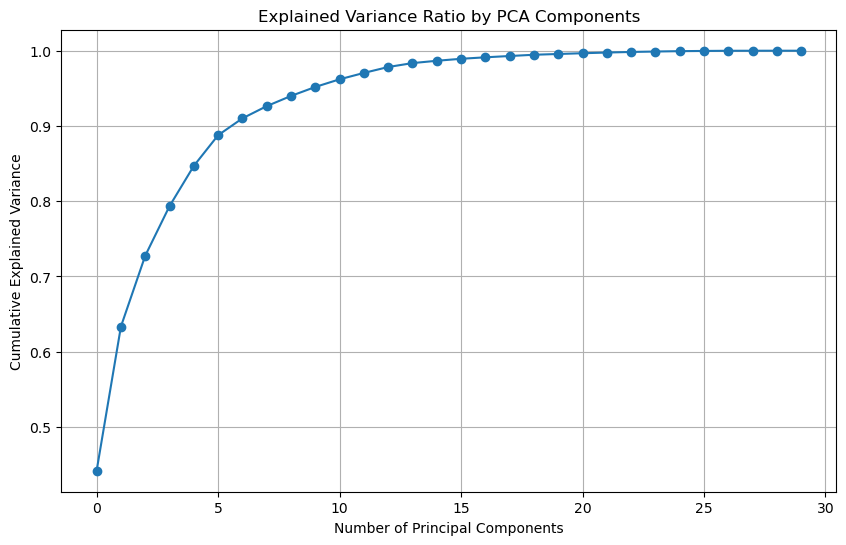

array([0.44174341, 0.63335522, 0.72746565, 0.79341734, 0.84690327,
       0.88767649, 0.9100959 , 0.92632083, 0.93988327, 0.95182302,
       0.96200649, 0.97048432, 0.97834313, 0.98354802, 0.98663615,
       0.98927803, 0.99124632, 0.99297015, 0.9946302 , 0.9956641 ,
       0.99665876, 0.99755796, 0.99835626, 0.99893517, 0.9994294 ,
       0.99969789, 0.99992052, 0.99997094, 0.99999557, 1.        ])

In [5]:

pca = PCA()
pca.fit(xtrain_scaled)


plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio by PCA Components')
plt.grid(True)
plt.show()


cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance_ratio


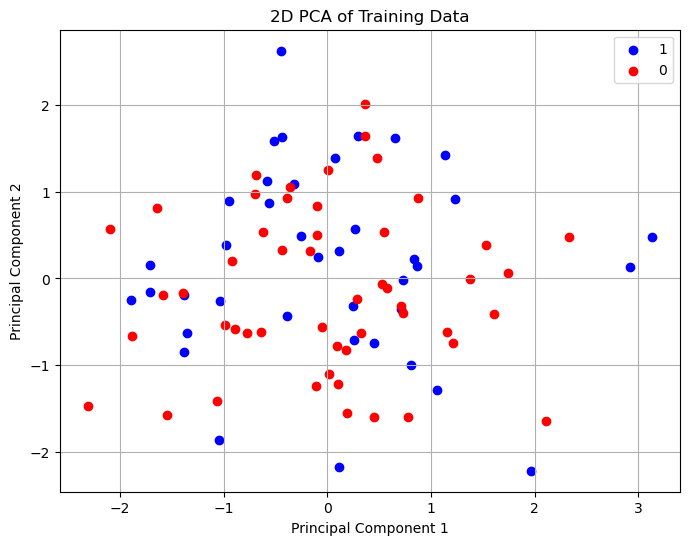

In [6]:
y_train = y_train[:90]
np.random.seed(42)
mock_features = np.random.normal(size=(90, 3))  


mock_scaled = scaler.fit_transform(mock_features)

pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(mock_scaled)


pca_df = pd.DataFrame(data=pca_2d_result, columns=['PC1', 'PC2'])
pca_df['label'] = y_train  


plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for label, color in zip(pca_df['label'].unique(), colors):
    plt.scatter(pca_df[pca_df['label'] == label]['PC1'], 
                pca_df[pca_df['label'] == label]['PC2'], 
                label=label, 
                c=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Training Data')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
y_test = y_test[:10]
model2 = LogisticRegression()
start = time.time()


model2.fit(pca_2d_result, y_train)

end = time.time()
model2_training_time = end - start


mock_test_features = np.random.normal(size=(10, 3))  
mock_test_scaled = scaler.transform(mock_test_features)


pca_test_result = pca_2d.transform(mock_test_scaled)


ytest_pred = model2.predict(pca_test_result)


accuracy_test = accuracy_score(y_test, ytest_pred)
recall_test = recall_score(y_test, ytest_pred)

model2_training_time, accuracy_test, recall_test


(0.0, 0.3, 0.0)